In [1]:
import xml.etree.ElementTree as ET
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
tree = ET.parse('customers_orders.xml') 
root = tree.getroot()

In [3]:
data = []
for customer in root.findall('Customer'):
    customer_id = customer.find('CustomerID').text
    name = customer.find('Name').text
    for order in customer.find('Orders').findall('Order'):
        order_id = order.find('OrderID').text
        order_date = order.find('OrderDate').text
        for item in order.find('Items').findall('Item'):
            product_id = item.find('ProductID').text
            product_name = item.find('ProductName').text
            price = float(item.find('Price').text)
            quantity = int(item.find('Quantity').text)
            total = price * quantity
            data.append([customer_id, name, order_id, order_date, product_id, product_name, price, quantity, total])


In [4]:
columns = ['CustomerID', 'Name', 'OrderID', 'OrderDate', 'ProductID', 'ProductName', 'Price', 'Quantity', 'Total']
df = pd.DataFrame(data, columns=columns)

In [5]:
revenue_per_customer = df.groupby('Name')['Total'].sum().reset_index()

In [6]:
top_products = df.groupby('ProductName')['Total'].sum().reset_index().sort_values(by='Total', ascending=False)

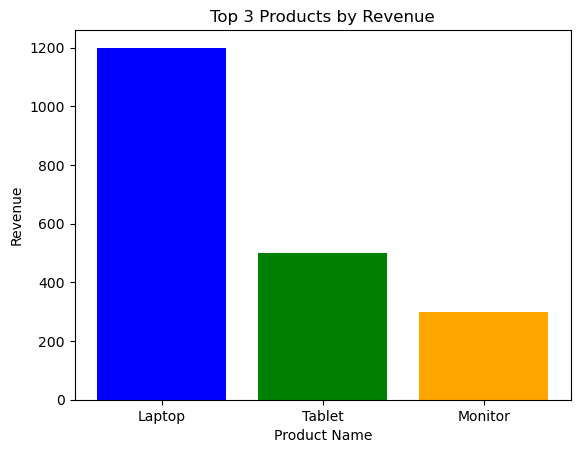

In [7]:
top_3_products = top_products.head(3)
plt.bar(top_3_products['ProductName'], top_3_products['Total'], color=['blue', 'green', 'orange'])
plt.title('Top 3 Products by Revenue')
plt.xlabel('Product Name')
plt.ylabel('Revenue')
plt.show()
